In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [5]:
iris = load_iris()
iris_data = iris.data

In [6]:
iris_label = iris.target
print(f'iris target 값 : {iris_label}')
print(f'iris target 명 : {iris.target_names}')

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


In [7]:
irisDF = pd.DataFrame(iris_data, columns=iris.feature_names)
irisDF['label'] = iris.target
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# 학습용, 테스트용 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label,
                                                    test_size=0.2,random_state=11)

In [9]:
# DecisionTreeClassfier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

In [10]:
# 학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [11]:
# 학습 완룐된 객체를 사용해 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

지도학습 : Estimator
 - 분류 알고리즘 : Classfier  
 - 회귀 알고리즘 : Regressor



In [12]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [13]:
keys = iris.keys()
print(f'붓꽃의 데이터 세트의 키들 : {keys}')

붓꽃의 데이터 세트의 키들 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
# iris() 반환하는 객체의 키
print('\n feature_names의 type:', type(iris.feature_names))
print('\n feature_names의 shape:', len(iris.feature_names))
print(iris.feature_names)


 feature_names의 type: <class 'list'>

 feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


학습/테스트 데이터 세트 분리 - train_test_split()

In [15]:
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data,train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print(f' 예측 정확도 : {accuracy_score(train_label,pred)}')

'''
학습 데이터로 예측을 수행했기 때문에 예측 정확도가 1이 나오는 과적합 발생
'''

 예측 정확도 : 1.0


'\n학습 데이터로 예측을 수행했기 때문에 예측 정확도가 1이 나오는 과적합 발생\n'

In [16]:
# 학습용, 테스트용 데이터셋 분리 학습 및 예측 수행
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,
                                                    test_size=0.3, random_state=10)

In [17]:
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print(f' 예측 정확도 : {accuracy_score(y_test,pred)}')

 예측 정확도 : 0.9777777777777777


교차 검증 수행

In [18]:
from sklearn.model_selection import KFold
import numpy as np

In [19]:
iris = load_iris()
label = iris.target
features = iris.data
dt_clf = DecisionTreeClassifier(random_state=156)

In [20]:
# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
Kfold = KFold(n_splits=5)
cv_accuracy = []
print(f'붓꽃 데이터 세트 크기 : {features.shape[0]}')

붓꽃 데이터 세트 크기 : 150


In [21]:
# Kfold의 객체의 split()을 호출하여 반환된 인덱스를 통해 예측 정확도 측정
n_iter = 0

# KFold 객체의 split()을 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스르 array로 반환
for train_index, test_index in Kfold.split(features):
    #Kfold.split()으로 반환된 인덱스를 이용해 학스뵹ㅇ, 검즘용 데트스 데이터 춫ㄹ
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f' 교차 검증 정확도 : {n_iter }, 학습 데이터 크기 : {train_size}, 검증 데이터 크기 : {test_size}')
    print(f'검증 세트 인덱스 : {n_iter},{test_index}')
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print(f'평균 검증 정확도 : {np.mean(cv_accuracy)}')

 교차 검증 정확도 : 1, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
검증 세트 인덱스 : 1,[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
 교차 검증 정확도 : 2, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
검증 세트 인덱스 : 2,[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
 교차 검증 정확도 : 3, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
검증 세트 인덱스 : 3,[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
 교차 검증 정확도 : 4, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
검증 세트 인덱스 : 4,[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
 교차 검증 정확도 : 5, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
검증 세트 인덱스 : 5,[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도 : 0.9


Stratified K 폴드

In [22]:
iris = load_iris()
irisDF['label'] = iris.target
irisDF['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [23]:
# 레이블 개수 분포 확인
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in Kfold.split(irisDF):
    n_iter += 1
    label_train = irisDF['label'].iloc[train_index]
    label_test = irisDF['label'].iloc[test_index]
    print(f' 교차검증 : {n_iter}')
    print(f'학습 레이블 데이터 분포 : {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포 : {label_test.value_counts()}')

 교차검증 : 1
학습 레이블 데이터 분포 : label
1    50
2    50
0    20
Name: count, dtype: int64
검증 레이블 데이터 분포 : label
0    30
Name: count, dtype: int64
 교차검증 : 2
학습 레이블 데이터 분포 : label
2    50
1    40
0    30
Name: count, dtype: int64
검증 레이블 데이터 분포 : label
0    20
1    10
Name: count, dtype: int64
 교차검증 : 3
학습 레이블 데이터 분포 : label
0    50
2    50
1    20
Name: count, dtype: int64
검증 레이블 데이터 분포 : label
1    30
Name: count, dtype: int64
 교차검증 : 4
학습 레이블 데이터 분포 : label
0    50
1    40
2    30
Name: count, dtype: int64
검증 레이블 데이터 분포 : label
2    20
1    10
Name: count, dtype: int64
 교차검증 : 5
학습 레이블 데이터 분포 : label
0    50
1    50
2    20
Name: count, dtype: int64
검증 레이블 데이터 분포 : label
2    30
Name: count, dtype: int64


In [24]:
# StratifiedKFold 사용
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(irisDF, irisDF['label']):
    n_iter += 1
    label_train = irisDF['label'].iloc[train_index]
    label_test = irisDF['label'].iloc[test_index]
    print(f'교차검증 : {n_iter}')
    print(f'학습 레이블 데이터 분포 : {label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포 : {label_test.value_counts()}')

교차검증 : 1
학습 레이블 데이터 분포 : label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포 : label
0    17
1    17
2    16
Name: count, dtype: int64
교차검증 : 2
학습 레이블 데이터 분포 : label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포 : label
0    17
2    17
1    16
Name: count, dtype: int64
교차검증 : 3
학습 레이블 데이터 분포 : label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포 : label
1    17
2    17
0    16
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import StratifiedKFold
# StratifideKFold split() 호출시 반드시 레비을 데이터 세트도 추가 입력 필요
for train_index, test_index in skf.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)

    # 반속 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'{n_iter} 교차 검증 정확도 :{accuracy}, 학습 데이터 크기 : {train_size}, 검증 데이터 크기 : {test_size}')
    print(f'{n_iter}검증 세트 인덱스 : {test_index}')
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print(f'\n## 교차 검증별 정확도 : {np.round(cv_accuracy,4)}')
print(f'\n## 평균 검증 정확도 : {np.round(np.mean(cv_accuracy))}')

4 교차 검증 정확도 :0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
4검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
5 교차 검증 정확도 :0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
5검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
6 교차 검증 정확도 :0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
6검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [1.     0.9667 0.8667 0.9333 0.7333 0.98   0.94   0.98  ]

## 평균 검증 정확도 : 1.0


### cross_val_score()

In [26]:
iris_data = load_iris()

In [27]:
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate

data = iris_data.data
label = iris_data.target
# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf,data, label, scoring='accuracy', cv=3)
print(f'교차 검증별 정확도 : {np.round(scores,4)}')
print(f'평균 검증 정확도 : {np.round(np.mean(scores))}')

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 1.0


### GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

## 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

# parim_grid의 하이퍼 파라미터를 3개의 train, test, set fold로 나누어 테스트 수행 설정
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습 시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train,y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scoresDF = pd.DataFrame(grid_dtree.cv_results_)
scoresDF[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [29]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_


#GrideSearchCV의 best_estimator는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print(f'테스트 데이터 세트 정확도 : {accuracy_score(y_test,pred)}')

테스트 데이터 세트 정확도 : 0.9666666666666667


### 데이터 인코딩
 - 레이블 인코딩
 - 원-핫 인코딩


In [30]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(f'인코딩 변환값 : {labels}')

인코딩 변환값 : [0 1 4 5 3 3 2 2]


In [35]:
# 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarra로 변환
items = np.array(items).reshape(-1,1)

# 원 핫 인코딩 적용
oh_encodre = OneHotEncoder()
oh_encodre.fit(items)
oh_labels = oh_encodre.transform(items)

# 원핫인코더로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [36]:
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


피쳐 스케일링과 정규화
 - 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
 - 표준화

In [39]:
# StandardScler
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 dataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data,columns=iris.feature_names)

print(f'feature들의 평균값 : {iris_df.mean()}')
print(f'feature들의 분산 값 : {iris_df.var()}')

feature들의 평균값 : sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
feature들의 분산 값 : sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [41]:
# StandardScler
from sklearn.preprocessing import StandardScaler

# 객체 생성
scaler = StandardScaler()
# 데이터 세트 변환
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print(f'feature들의 평균값 : {iris_df_scaled.mean()}')
print(f'feature들의 분산 값 : {iris_df_scaled.var()}')

feature들의 평균값 : sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature들의 분산 값 : sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [44]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# 객체 생성
scaler = MinMaxScaler()
# 데이터 세트 변환
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print(f'feature들의 최솟값 : {iris_df_scaled.min()}')
print(f'feature들의 최댓값 : {iris_df_scaled.max()}')

feature들의 최솟값 : sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최댓값 : sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [47]:
# 학습 데이터와 테스트 데이터 스케일링의 유의점

# scaler 클래스의 fit(), tramsform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

Scaler = MinMaxScaler()

# fit() 하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scaler로 train_array 데이터 변환함. 원본 10->1 로 변환됨
train_scaled = scaler.transform(train_array)

print(f'원본 train_array 데이터 : {np.round(train_array.reshape(-1),2)}')
print(f'scale된 train_array 데이터 : {np.round(train_scaled.reshape(-1),2)}')

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [49]:
# 테스트 데이터로 스케일링 진행하면 최솟값이 0, 최댓값이 5로 설정됨

scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

print(f'원본 test_array 데이터 : {np.round(test_array.reshape(-1),2)}')
print(f'scale된 test_array 데이터 : {np.round(test_scaled.reshape(-1),2)}')

원본 test_array 데이터 : [0 1 2 3 4 5]
scale된 test_array 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


사이킷런으로 타이타닉 생존자 예측

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
titanicDF = pd.read_csv(r'C:\Users\KDP-17\EX_PANDAS6\data\titanic.csv')
titanicDF.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [55]:
# 사이킷런 알고리즘은 NULL값 허용 X ==> NA값 처리
titanicDF['age'].fillna(titanicDF['age'].mean(),inplace=True)
titanicDF['embarked'].fillna('N',inplace=True)
titanicDF['deck'].fillna('N',inplace=True)
titanicDF['embark_town'].fillna('N',inplace=True)
print(titanicDF.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [56]:
# 성별이 생존 확률에 어떤 영향 미쳤는지 성별에 따른 생존자 수 비교
titanicDF.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

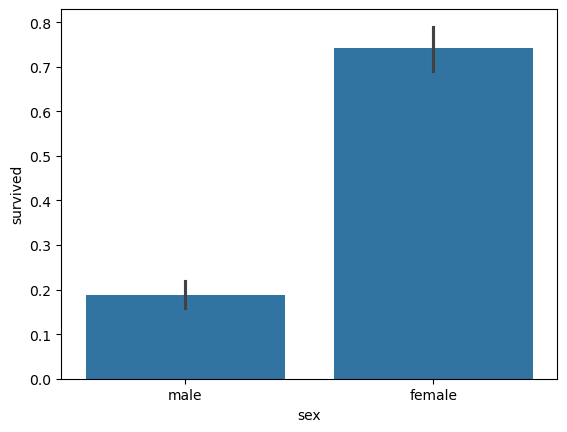

In [57]:
# 성별과 생존의 관계 시각화
sns.barplot(x='sex',y='survived',data=titanicDF)

<Axes: xlabel='pclass', ylabel='survived'>

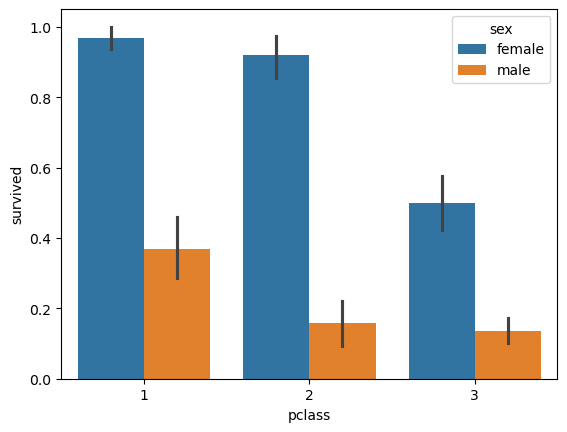

In [58]:
# 객실 등급과 생존의 관계 시각화
sns.barplot(x='pclass',y='survived',hue='sex',data=titanicDF)